In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'C:\Users\chand\Desktop\avinash\wine.csv')

In [5]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


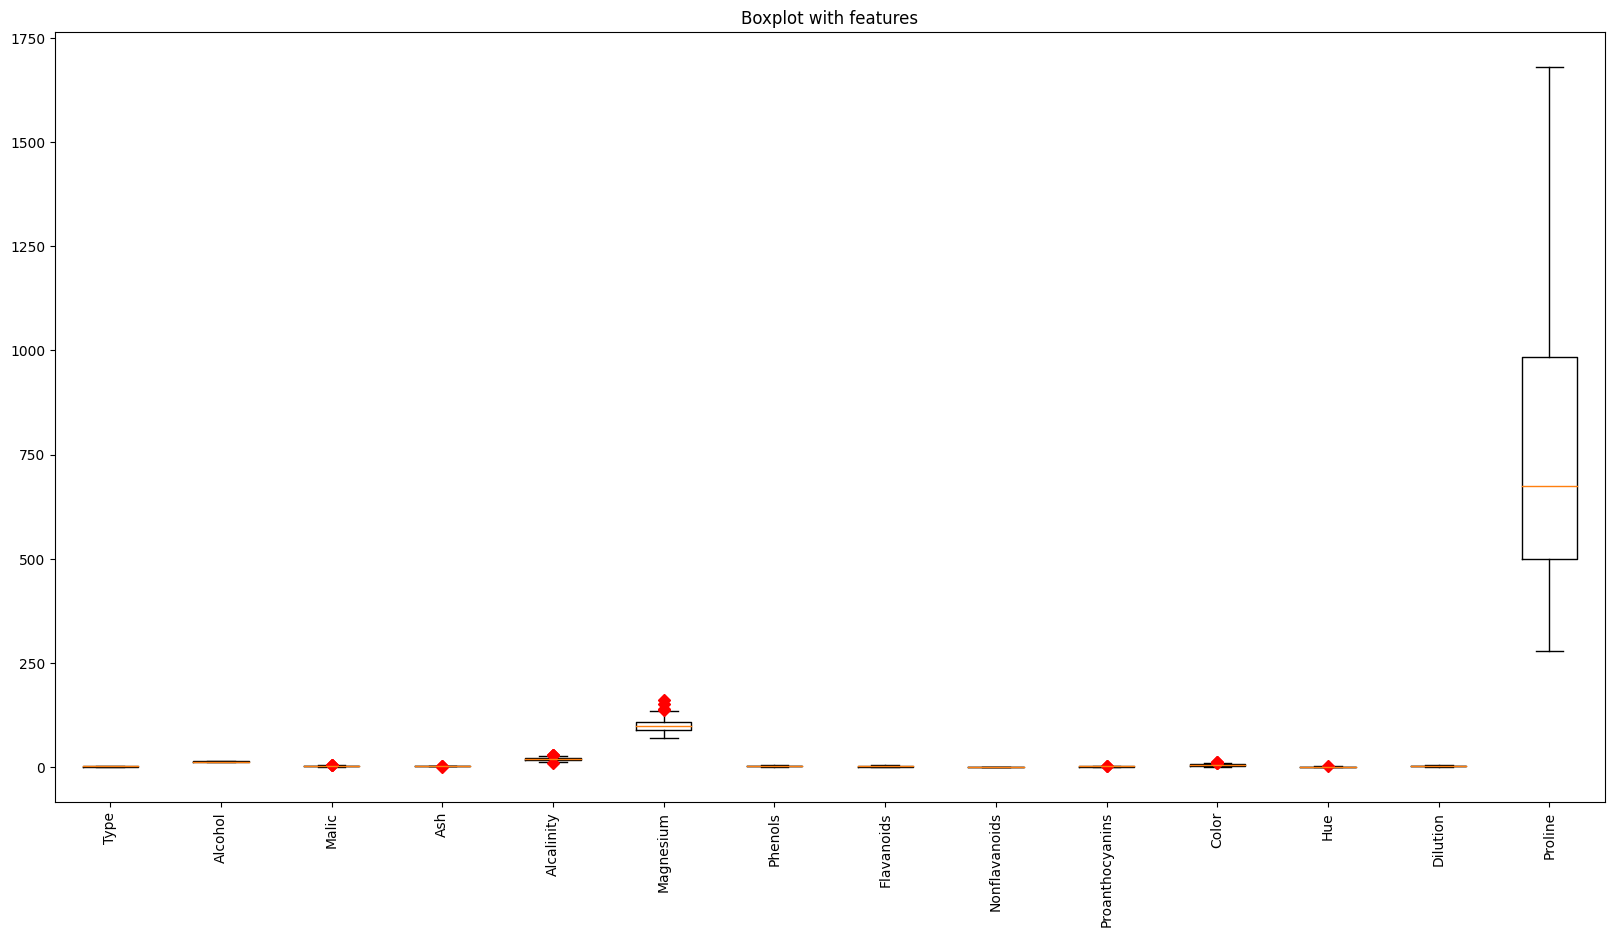

In [8]:
ls_features = list(df.keys())

plt.figure(figsize=(20, 10))
plt.title('Boxplot with features')
plt.boxplot(df.values, 0, 'rD', labels = ls_features)
plt.xticks(rotation = 90)

plt.show()

In [9]:
sc = StandardScaler()
df_scaled = sc.fit_transform(df)

In [10]:
kmeans = KMeans(n_clusters = 50)
kmeans.fit(df_scaled)

centroids = kmeans.cluster_centers_
labels_kmeans = kmeans.labels_

c:\Users\chand\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\chand\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


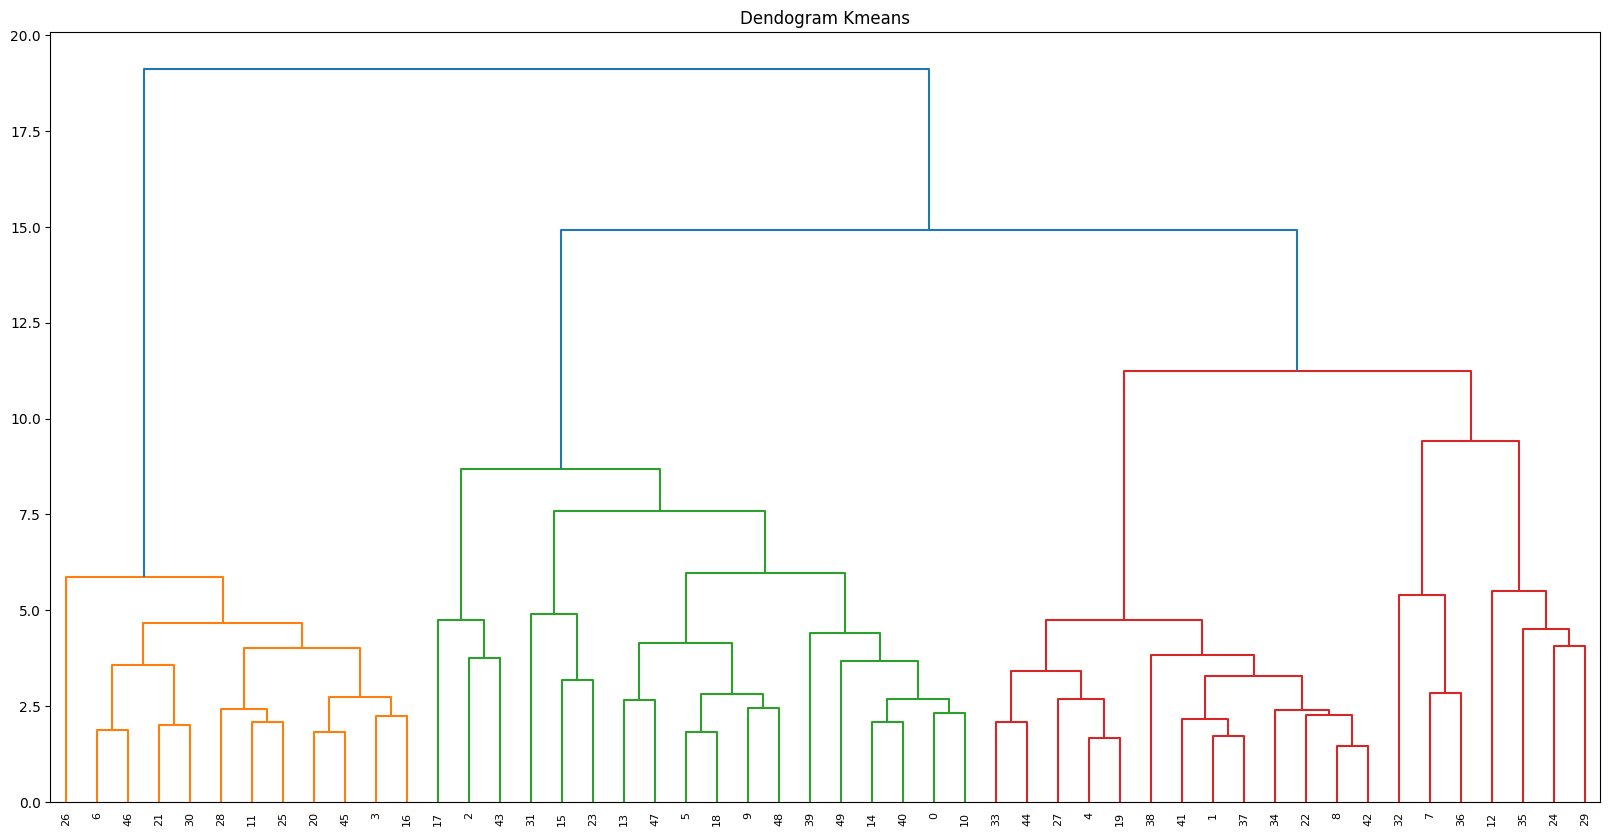

In [11]:
plt.figure(figsize=(20,10))

plt.title('Dendogram Kmeans')
Z = linkage(centroids, method = 'ward', metric = 'euclidean')
dendrogram(Z, leaf_rotation = 90., color_threshold = 12);
plt.show()

In [12]:
cluster = AgglomerativeClustering(n_clusters = 3)

cluster.fit(centroids)

labels_cluster = cluster.labels_

In [13]:
df_norm = pd.DataFrame(df_scaled)

In [14]:
for i in range(50):
    df_norm.loc[labels_kmeans==i, 'cluster'] = labels_cluster[i]

In [15]:
new_centroids = df_norm.groupby(by='cluster').mean()

In [16]:
new_centroids

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
cluster,,,,,,,,,,,,,,
0.0,-1.076711,0.751064,-0.333482,0.322882,-0.572663,0.657512,0.810211,0.901261,-0.602182,0.606876,0.107592,0.499780,0.739580,1.033612
1.0,1.373864,0.189159,0.895331,0.257945,0.577065,-0.030127,-0.987617,-1.252761,0.690119,-0.766287,1.011418,-1.205382,-1.310950,-0.372578
2.0,0.079960,-0.916404,-0.327595,-0.526431,0.157760,-0.655464,-0.094818,0.010145,0.103410,-0.051126,-0.869518,0.388638,0.220521,-0.786479


In [17]:
kmeans2 = KMeans(n_clusters = 3, init = new_centroids)
kmeans2_pred = kmeans2.fit_predict(df_norm.drop("cluster",axis=1))

centroids2 = kmeans2.cluster_centers_
labels2 = kmeans2.labels_

c:\Users\chand\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\chand\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\chand\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [18]:
kmeans2_pred = pd.DataFrame(kmeans2_pred)
kmeans2_pred= kmeans2_pred.rename(columns = {0: 'Labels'})
kmeans2_pred.head()

,Labels
0,0
1,0
2,0
3,0
4,0


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
data_2D = pca.fit_transform(df_norm)
pca_final = pd.DataFrame(data_2D, columns=['X', 'Y'])
df_norm = pd.DataFrame(df_norm, columns=df_norm.columns.astype(str))
df_norm = df_norm.reset_index(drop=True)
pca_final.head()

In [19]:
df_pred = [pca_final, kmeans2_pred]
final_df = pd.concat(df_pred, axis=1)
final_df.head()

,X,Y,Labels
0,-3.438572,-1.445969,0
1,-2.383843,0.332028,0
2,-2.686754,-1.032594,0
3,-3.843105,-2.759543,0
4,-1.277939,-0.869188,0


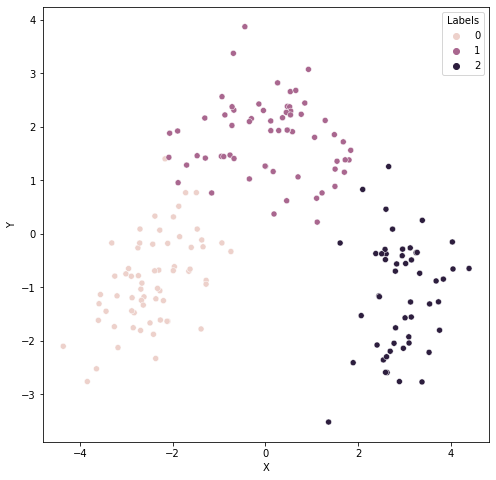

In [20]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='X', y='Y', hue='Labels', data=final_df);